In [3]:
import matplotlib.pyplot as plt
import numpy as np
from helpers_plot import initPlot, finalizePlot

# Example for effective triangles

Due to the finite bin-size, the bispectrum measurements get slightly (or not so slightly) biased. This is because the estimator essentially measures the bispectrum averaged over a bin, while we are interested in the bispecturm value for exactly a specific $k$-triangle. The effect can be corrected, by assigning an effective triangle configuration to a $k$-bin. A (rather heuristically derived) formula for the effective triangles is given in https://arxiv.org/abs/1908.01774 . We implemented this version here.

## Run BiG with effective triangles calculation for equilateral triangles

We demonstrate the effect using the example data in `examples/`

In [2]:
# Run BiG

!python ../scripts/runBispectrumExtractor.py --L 1000 --Nmesh 512 --Nkbins 19 --kmin 0.01 --kmax 1.91 --kbinmode lin --mode equilateral --outfn ../tests/testRun_output_effectiveTriangles_ --infiles ../tests/testRun_input.dat --verbose --doTiming --filetype numpy --effectiveTriangles


Finished reading CMD line arguments
Settings:
Boxsize: 1000.0 Mpc/h
Grid Cells (1D): 512
ks: [0.01 0.11 0.21 0.31 0.41 0.51 0.61 0.71 0.81 0.91 1.01 1.11 1.21 1.31
 1.41 1.51 1.61 1.71 1.81]
Using lin binning
Triangles: equilateral
Reading density files from ../tests/testRun_input.dat
Writing output to ../tests/testRun_output_effectiveTriangles_
Calculating and outputting effective triangles
Finished setting members of bispectrumExtractor
Creating k-mesh
Finished initialization BispectrumExtractor
Finished calculating bispectrum norm
Needed 6.112961769104004 seconds to run
Finished calculating effective triangles
Needed 4.420997619628906 seconds to run
Calculating bispectrum for ../examples/test_grid_512_1.npy

Doing Fourier Transformation of density field
Doing Bispec calculation
Finished bispectrum calculation
Needed 6.241374731063843 seconds to run
Written output to ../tests/testRun_output_effectiveTriangles_test_grid_512_1.dat
Calculating bispectrum for ../examples/test_grid_512_2.

## Comparison between effective triangles and bin centers

In [8]:
# Load BiG Results
big_results_1=np.loadtxt("testRun_output_effectiveTriangles_test_grid_512_1.dat")
big_results_2=np.loadtxt("testRun_output_effectiveTriangles_test_grid_512_2.dat")

big_k_1=big_results_1[:,0]
big_k_1_eff=big_results_1[:,3]

big_Bk_1=big_results_1[:,8]

big_k_2=big_results_2[:,0]
big_k_2_eff=big_results_2[:,3]

big_Bk_2=big_results_2[:,8]

In [5]:
# To make pretty plots
initPlot(labelsize=14, titlesize=14, legendsize=14, usetex=True, fontfamily='sans-serif')


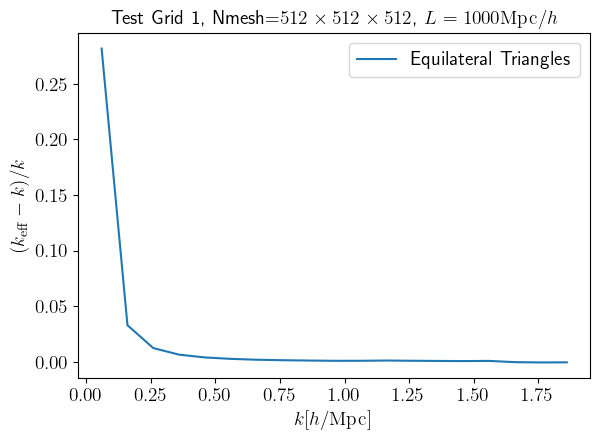

In [17]:
# Plot 

fig, ax=plt.subplots()
ax.set_title(r"Test Grid 1, Nmesh=$512 \times 512 \times 512$, $L=1000 \mathrm{Mpc}/h$ ")

ax.plot(big_k_1, (big_k_1_eff-big_k_1)/big_k_1, label='Equilateral Triangles')

ax.set_xlabel(r"$k [h/\mathrm{Mpc}]$")

ax.set_ylabel(r"${(k_\mathrm{eff}-k)}/{k}$")
finalizePlot(ax, outputFn="Testgrid1_effectiveTriangles.png")

## Run BiG with effective triangles calculation for non-equilateral triangles

The effect is worse for non-equilateral triangles, so we look at it here

In [4]:
# Run BiG

!python ../scripts/runBispectrumExtractor.py --L 1000 --Nmesh 512 --Nkbins 9 --kmin 0.01 --kmax 1.91 --kbinmode lin --mode all --outfn ../tests/testRun_output_effectiveTriangles_all_ --infiles ../tests/testRun_input.dat --verbose --doTiming --filetype numpy --effectiveTriangles


Finished reading CMD line arguments
Settings:
Boxsize: 1000.0 Mpc/h
Grid Cells (1D): 512
ks: [0.01       0.22111111 0.43222222 0.64333333 0.85444444 1.06555556
 1.27666667 1.48777778 1.69888889]
Using lin binning
Triangles: all
Reading density files from ../tests/testRun_input.dat
Writing output to ../tests/testRun_output_effectiveTriangles_all_
Calculating and outputting effective triangles
Finished setting members of bispectrumExtractor
Creating k-mesh
Finished initialization BispectrumExtractor
Finished calculating bispectrum norm
Needed 16.400237321853638 seconds to run
Finished calculating effective triangles
Needed 31.32236957550049 seconds to run
Calculating bispectrum for ../examples/test_grid_512_1.npy

Doing Fourier Transformation of density field
Doing Bispec calculation
Finished bispectrum calculation
Needed 17.05389165878296 seconds to run
Written output to ../tests/testRun_output_effectiveTriangles_all_test_grid_512_1.dat
Calculating bispectrum for ../examples/test_grid_5

In [6]:
# Load BiG Results
big_results_1=np.loadtxt("testRun_output_effectiveTriangles_all_test_grid_512_1.dat")
big_results_2=np.loadtxt("testRun_output_effectiveTriangles_all_test_grid_512_2.dat")

big_k_1=big_results_1[:,0]
big_k_2=big_results_1[:,1]
big_k_3=big_results_1[:,2]

big_k_1_eff=big_results_1[:,3]
big_k_2_eff=big_results_1[:,4]
big_k_3_eff=big_results_1[:,5]


big_Bk=big_results_1[:,8]


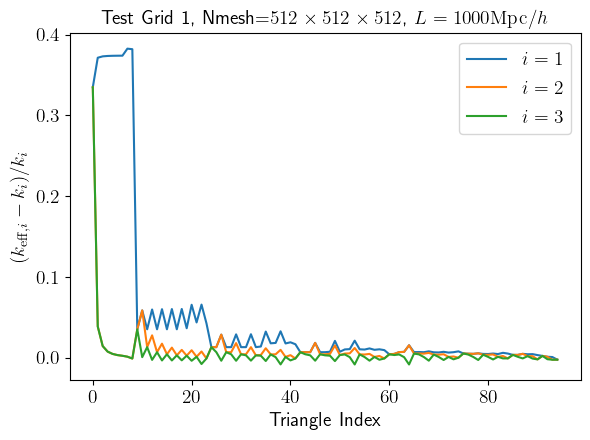

In [12]:
# Plot 

fig, ax=plt.subplots()
ax.set_title(r"Test Grid 1, Nmesh=$512 \times 512 \times 512$, $L=1000 \mathrm{Mpc}/h$ ")

ax.plot((big_k_1_eff-big_k_1)/big_k_1, label='$i=1$')
ax.plot((big_k_2_eff-big_k_2)/big_k_2, label='$i=2$')
ax.plot((big_k_3_eff-big_k_3)/big_k_3, label='$i=3$')



ax.set_xlabel(r"Triangle Index")

ax.set_ylabel(r"${(k_{\mathrm{eff},i}-k_i)}/{k_i}$")
finalizePlot(ax, outputFn="Testgrid1_effectiveTriangles_all.png")